In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("C:/Users/hp/Desktop/Prediction-Churn/Copy of Telco_customer_churn_1.csv")

In [3]:
Data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
# Display data types of each column
Data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat_Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Label           object
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
Churn_Reason          object
dtype: object

In [5]:
# Select key variables
key_variables = [
    'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 
    'Tenure_Months', 'Contract', 'Paperless_Billing', 'Payment_Method', 
    'Monthly_Charges', 'Total_Charges', 'Internet_Service', 
    'Online_Security', 'Tech_Support', 'Streaming_TV', 'Churn_Label'
]

# Filter the dataset
df = Data[key_variables]


In [6]:
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Internet_Service,Online_Security,Tech_Support,Streaming_TV,Churn_Label
0,Male,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,No,No,Yes
1,Female,No,No,Yes,2,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,Yes
2,Female,No,No,Yes,8,Month-to-month,Yes,Electronic check,99.65,820.5,Fiber optic,No,No,Yes,Yes
3,Female,No,Yes,Yes,28,Month-to-month,Yes,Electronic check,104.80,3046.05,Fiber optic,No,Yes,Yes,Yes
4,Male,No,No,Yes,49,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Fiber optic,No,No,Yes,Yes


In [7]:
data_4 = df.copy()

NOTE: data_4 will be used for analyzing Objictive 4

The dataset is loaded and filtered to include only key variables relevant to churn prediction.

In [8]:
df.info

<bound method DataFrame.info of       Gender Senior_Citizen Partner Dependents  Tenure_Months        Contract  \
0       Male             No      No         No              2  Month-to-month   
1     Female             No      No        Yes              2  Month-to-month   
2     Female             No      No        Yes              8  Month-to-month   
3     Female             No     Yes        Yes             28  Month-to-month   
4       Male             No      No        Yes             49  Month-to-month   
...      ...            ...     ...        ...            ...             ...   
7038  Female             No      No         No             72        Two year   
7039    Male             No     Yes        Yes             24        One year   
7040  Female             No     Yes        Yes             72        One year   
7041  Female             No     Yes        Yes             11  Month-to-month   
7042    Male             No      No         No             66        Two year

**Data Types and Conversion**

Ensure all data types are appropriate for analysis. Convert categorical variables to numerical formats where necessary.

In [9]:
# Display data types of each column
df.dtypes


Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Internet_Service      object
Online_Security       object
Tech_Support          object
Streaming_TV          object
Churn_Label           object
dtype: object

In [10]:
# Convert specific columns to categorical
categorical_cols = [
    'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Contract', 
    'Paperless_Billing', 'Payment_Method', 'Internet_Service', 
    'Online_Security', 'Tech_Support', 'Streaming_TV', 'Churn_Label'
]

In [11]:
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert Tenure_Months to integer (it should already be int64)
# df['Total_Charges'] = df['Total_Charges'].astype(int)

# Convert Monthly_Charges to float (it should already be float64)
# df['Monthly_Charges'] = df['Monthly_Charges'].astype(float)

<ipython-input-11-2364be92295b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')


In [12]:
# Convert Total_Charges to float, handling non-numericdf.loc[:, 'Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')
df.loc[:, 'Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
# Print the updated DataFrame dtypes
print(df.dtypes)


Gender               category
Senior_Citizen       category
Partner              category
Dependents           category
Tenure_Months           int64
Contract             category
Paperless_Billing    category
Payment_Method       category
Monthly_Charges       float64
Total_Charges         float64
Internet_Service     category
Online_Security      category
Tech_Support         category
Streaming_TV         category
Churn_Label          category
dtype: object


In [14]:
# Output updated DataFrame to verify conversions
print(df.head())


   Gender Senior_Citizen Partner Dependents  Tenure_Months        Contract  \
0    Male             No      No         No              2  Month-to-month   
1  Female             No      No        Yes              2  Month-to-month   
2  Female             No      No        Yes              8  Month-to-month   
3  Female             No     Yes        Yes             28  Month-to-month   
4    Male             No      No        Yes             49  Month-to-month   

  Paperless_Billing             Payment_Method  Monthly_Charges  \
0               Yes               Mailed check            53.85   
1               Yes           Electronic check            70.70   
2               Yes           Electronic check            99.65   
3               Yes           Electronic check           104.80   
4               Yes  Bank transfer (automatic)           103.70   

   Total_Charges Internet_Service Online_Security Tech_Support Streaming_TV  \
0         108.15              DSL             Yes

In [15]:
# Check for missing values
print(df.isnull().sum())

Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure_Months         0
Contract              0
Paperless_Billing     0
Payment_Method        0
Monthly_Charges       0
Total_Charges        11
Internet_Service      0
Online_Security       0
Tech_Support          0
Streaming_TV          0
Churn_Label           0
dtype: int64


In [16]:
# Fill missing 'TotalCharges' with the median value
df['Total_Charges'].fillna(df['Total_Charges'].mean(), inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


**Missing values** in **Total_Charges** are handled by converting non-numeric values to NaN and using Mean imputation.

In [17]:
# Check for missing values
print(df.isnull().sum())

Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Internet_Service     0
Online_Security      0
Tech_Support         0
Streaming_TV         0
Churn_Label          0
dtype: int64


**Encoding Categorical Variables**

Use techniques such as one-hot encoding or label encoding for categorical features.

In [18]:
# Convert categorical variables to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

Categorical variables are encoded using LabelEncoder.

In [19]:
# Print the updated DataFrame dtypes
print(df.dtypes)

Gender               category
Senior_Citizen       category
Partner              category
Dependents           category
Tenure_Months           int64
Contract             category
Paperless_Billing    category
Payment_Method       category
Monthly_Charges       float64
Total_Charges         float64
Internet_Service     category
Online_Security      category
Tech_Support         category
Streaming_TV         category
Churn_Label          category
dtype: object


**Descriptive Statistics**

Compute basic statistics for numerical features.

In [20]:
# Compute basic statistics for numerical features
df.describe()

,Tenure_Months,Monthly_Charges,Total_Charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


The basic statistics (mean, median, mode, standard deviation) provide an overview of the numerical features.

**Visualization**

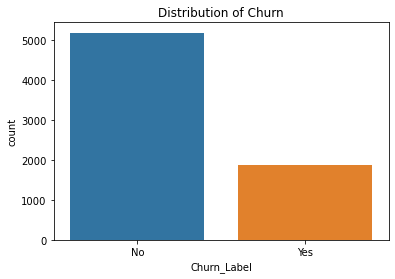

In [21]:
# Distribution of Churn
sns.countplot(x='Churn_Label', data=df)
plt.title('Distribution of Churn')
plt.show()

The distribution of churn shows the proportion of customers who have churned.

In [22]:
# Preprocessing: Drop rows with missing Churn_Reason
Data_2= Data.dropna(subset=['Churn_Reason'])

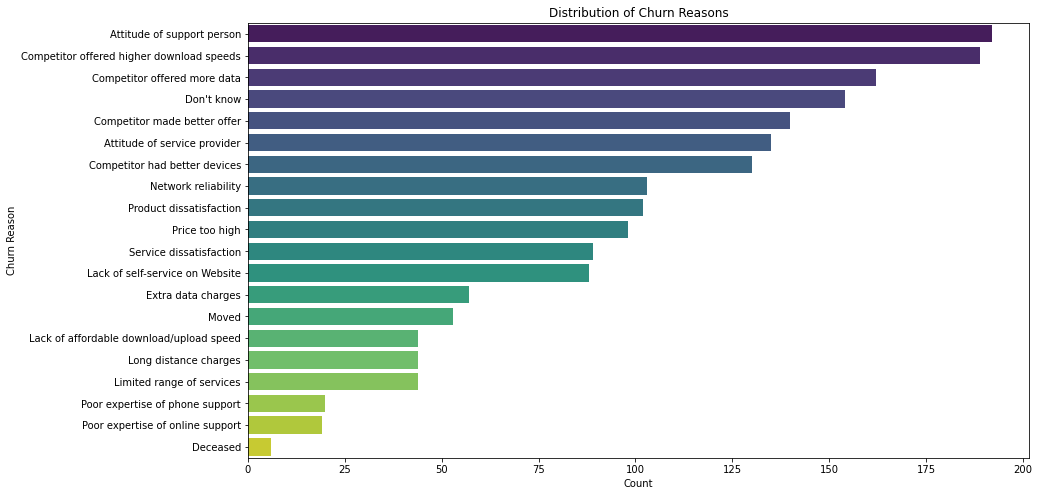

In [23]:
# Plot the distribution of Churn_Reason
plt.figure(figsize=(14, 8))
sns.countplot(y='Churn_Reason', data=Data_2, order=Data_2['Churn_Reason'].value_counts().index, palette='viridis')
plt.title('Distribution of Churn Reasons')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.show()

In [24]:
# Preprocessing: Drop rows with missing Churn_Score if any
Data_2 = Data_2.dropna(subset=['Churn_Score'])

In [25]:
# Convert Churn_Label to numeric if necessary
Data_2['Churn_Label'] = Data_2['Churn_Label'].apply(lambda x: 1 if x == 'Yes' else 0)

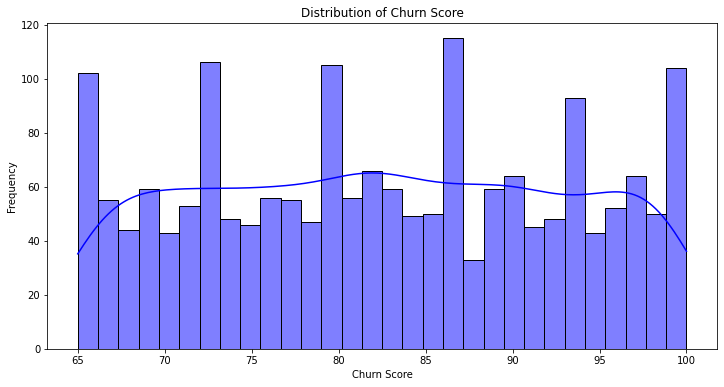

In [26]:
# Plot the distribution of Churn_Score
plt.figure(figsize=(12, 6))
sns.histplot(Data_2['Churn_Score'], kde=True, color='blue', bins=30)
plt.title('Distribution of Churn Score')
plt.xlabel('Churn Score')
plt.ylabel('Frequency')
plt.show()

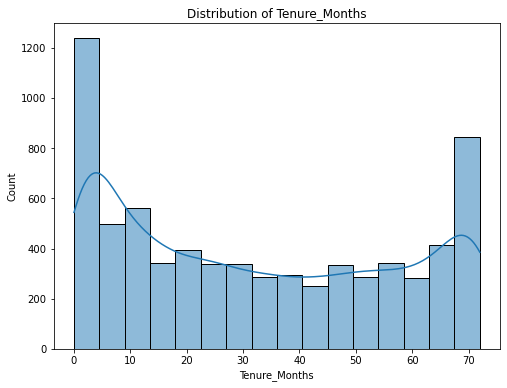

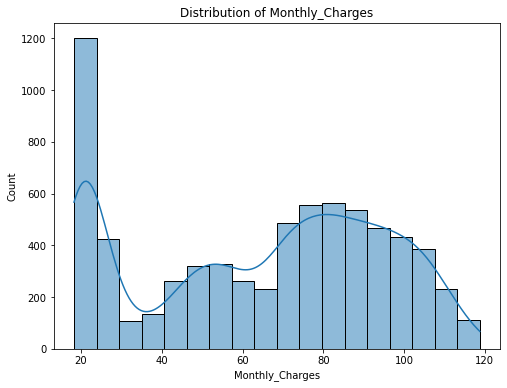

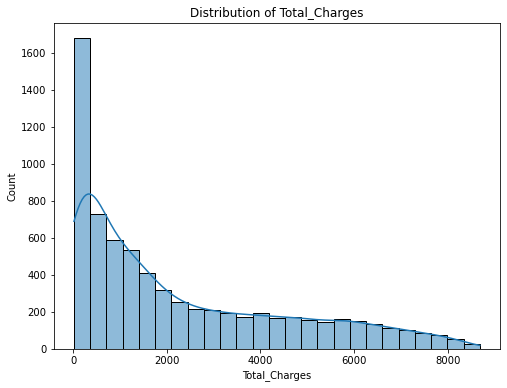

In [27]:
# Distribution of numerical variables
numerical_vars = ['Tenure_Months', 'Monthly_Charges', 'Total_Charges']

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

**Distribution of Numerical Variables**

*Tenure:* Most customers have a tenure below 20 months, with a noticeable drop-off after that.

*Monthly Charges:* The distribution is right-skewed, with most customers paying around $70 per month.

*Total Charges:* The distribution is right-skewed, with most customers having total charges below $2,000.

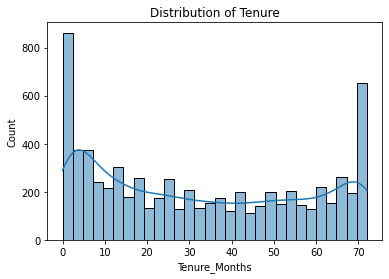

In [28]:
# Distribution of tenure
sns.histplot(df['Tenure_Months'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.show()

Tenure Distribution Shows how long customers typically stay with the service.

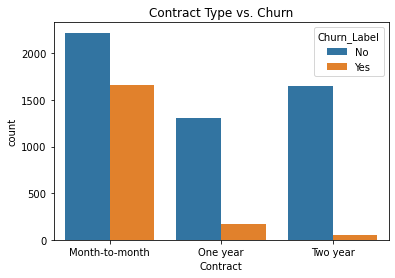

In [29]:
# Contract type vs. Churn
sns.countplot(x='Contract', hue='Churn_Label', data=df )
plt.title('Contract Type vs. Churn')
plt.show()

Highlights the impact of different contract types on churn rates

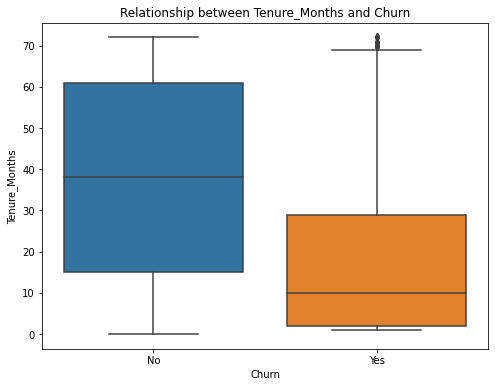

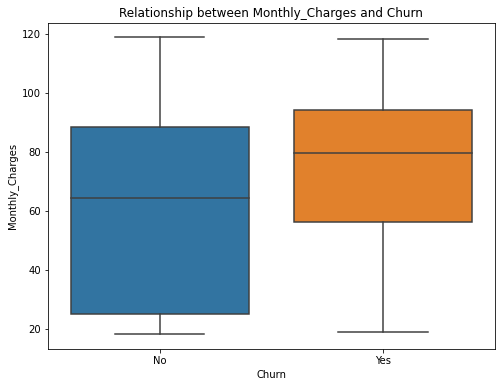

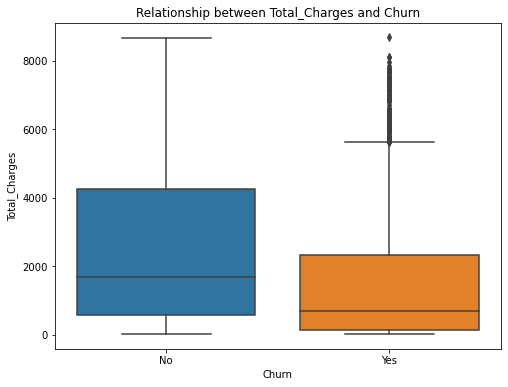

In [30]:
# Relationship between numerical variables and Churn
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Churn_Label', y=var)
    plt.title(f'Relationship between {var} and Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.show()

**Relationship between Numerical Variables and Churn**

1. *Tenure:* Customers with shorter tenure are more likely to churn.

2. *Monthly Charges:* Customers with higher monthly charges are slightly more likely to churn.

3. *Total Charges:* There is no clear relationship between total charges and churn

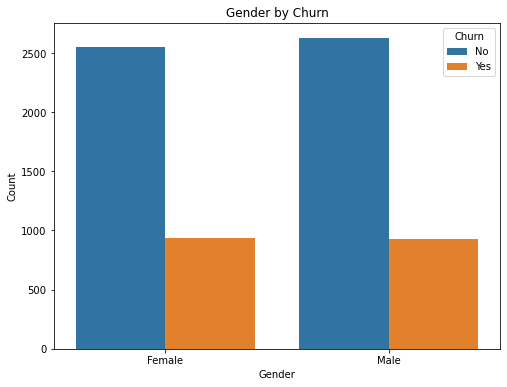

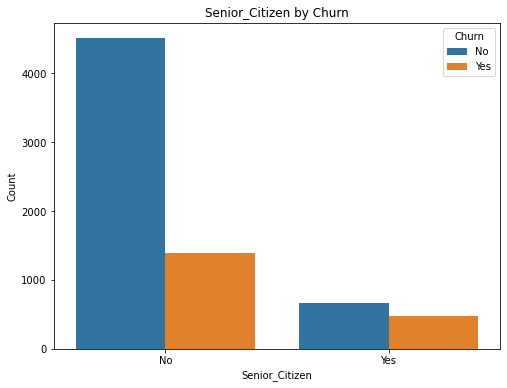

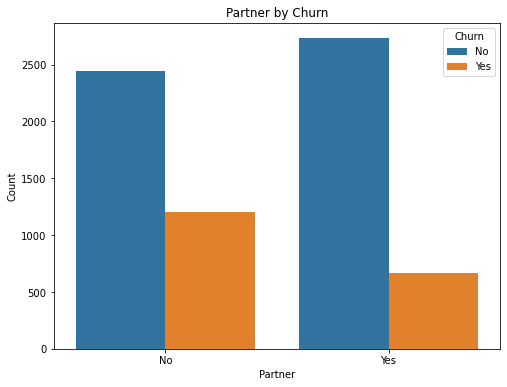

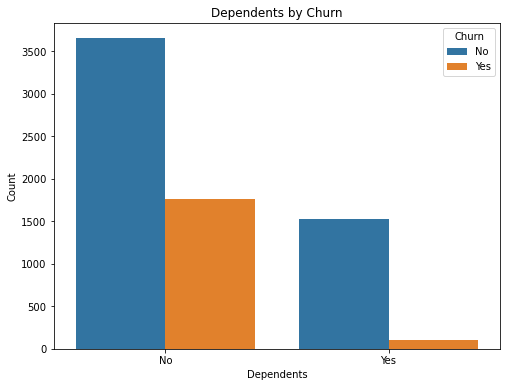

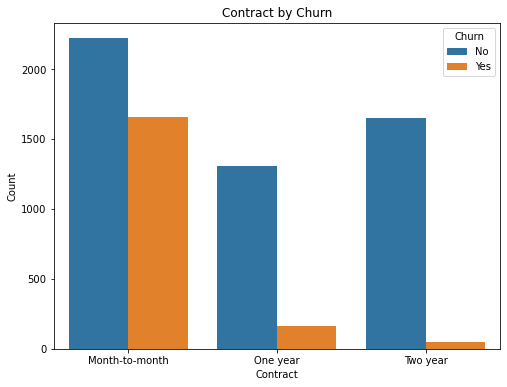

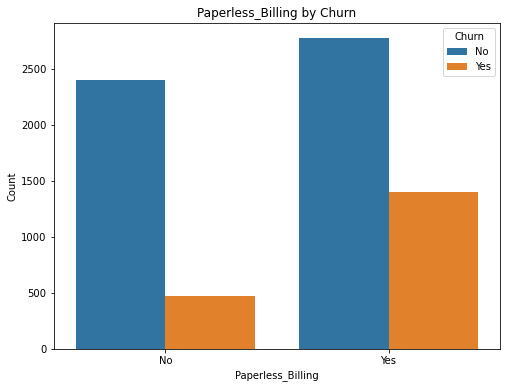

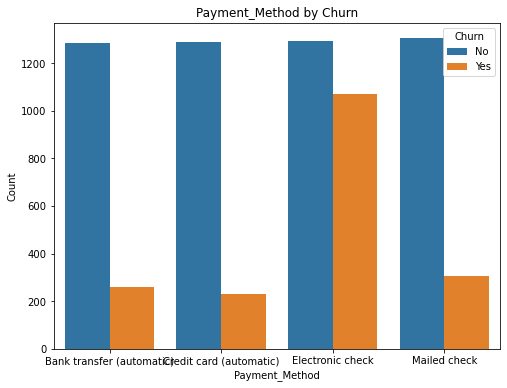

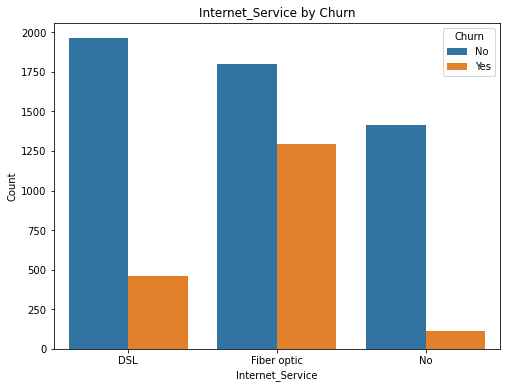

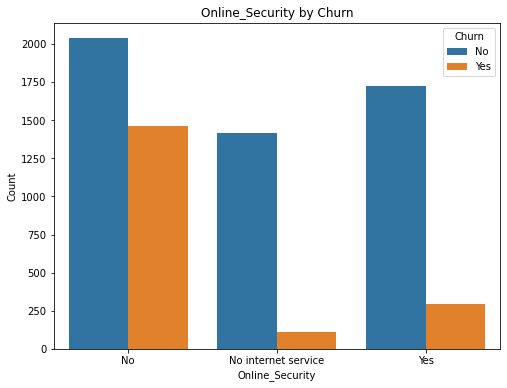

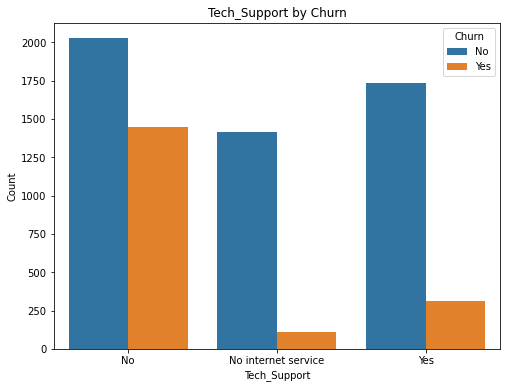

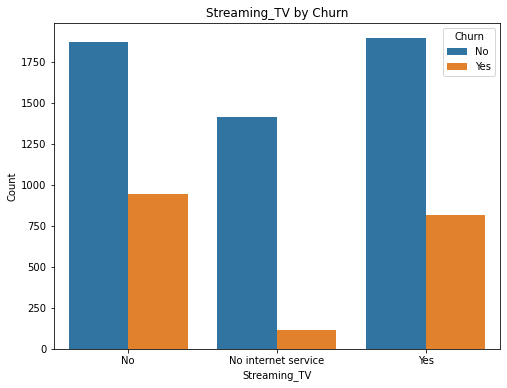

In [31]:
# Countplots of categorical variables
categorical_vars = ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Internet_Service', 'Online_Security', 'Tech_Support', 'Streaming_TV']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='Churn_Label')
    plt.title(f'{var} by Churn')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.show()

Categorical Variables by Churn

Gender: There is no significant difference in churn rate between genders.

Senior Citizen: Senior citizens have a higher churn rate.

Partner: Customers without partners are more likely to churn.

Dependents: Customers without dependents are more likely to churn.

Contract: Month-to-month contracts have the highest churn rate, while two-year contracts have the lowest.

Paperless Billing: Customers with paperless billing have a higher churn rate.

Payment Method: Customers using electronic check have the highest churn rate.

Internet Service: Fiber optic service customers have the highest churn rate.

Online Security: Customers without online security are more likely to churn.

Tech Support: Customers without tech support are more likely to churn.

Streaming TV: Customers with streaming TV are more likely to churn.

**Correlation Analysis**

Calculate the correlation matrix to identify relationships between numerical features and churn.

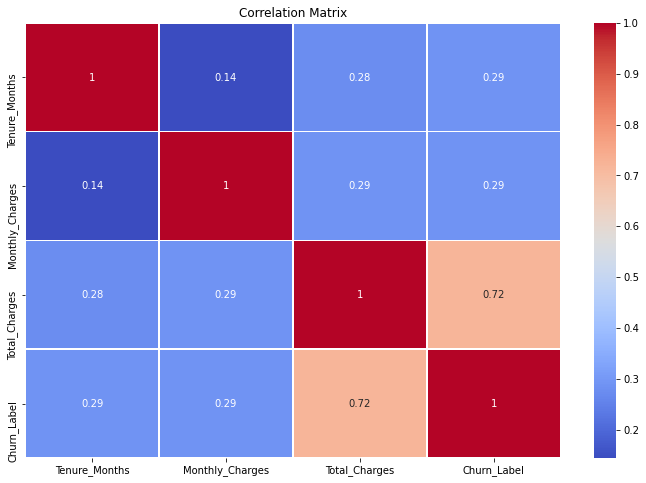

In [32]:
# Correlation matrix of numerical variables
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_vars + ['Churn_Label']].apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

***Correlation Matrix***

**Tenure** has a negative correlation with churn, indicating longer-tenure customers are less likely to churn.

**Monthly Charges and Total Charges** have a weak positive correlation with churn.

The correlation matrix visualizes the relationships between different features and churn, helping identify strongly correlated features.

# Objective 1

**Analyze Customer Data to Identify Key Factors that Contribute to Customer Churn**

**Chi-square Test**

We'll perform the chi-square test of independence for each of the Categorical variables.

In [33]:
import scipy.stats as stats

In [34]:
df_2 = df.copy()

In [35]:
# Convert Churn_Label to numeric if necessary
df_2['Churn_Label'] = df_2['Churn_Label'].apply(lambda x: 1 if x == 'Yes' else 0)


In [36]:
# List of categorical columns
categorical_columns = ['Phone_Service', 'Internet_Service', 'Online_Security', 'Online_Backup', 
                       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 
                       'Contract', 'Paperless_Billing', 'Payment_Method', 'Gender', 'Senior_Citizen', 
                       'Partner', 'Dependents', 'Multiple_Line']

In [37]:
# Dictionary to store chi-square test results
chi2_results = {}

In [38]:
# Perform chi-square test for each categorical variable
for col in categorical_columns:
    if col in Data.columns:
        contingency_table = pd.crosstab(Data[col], Data['Churn_Label'])
        chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
        chi2_results[col] = {'chi2': chi2, 'p_value': p}
    else:
        print(f"Column '{col}' does not exist in the DataFrame")


Column 'Multiple_Line' does not exist in the DataFrame


In [39]:
# Convert the results dictionary to a DataFrame
results_Data = pd.DataFrame(chi2_results).T.reset_index()
results_Data.columns = ['Variable', 'Chi-Square Value', 'p-value']

In [40]:
# Display the results
results_Data.sort_values(by='p-value', inplace=True)
results_Data.reset_index(drop=True, inplace=True)
print(results_Data)

             Variable  Chi-Square Value        p-value
0            Contract       1184.596572  5.863038e-258
1     Online_Security        849.998968  2.661150e-185
2        Tech_Support        828.197068  1.443084e-180
3    Internet_Service        732.309590  9.571788e-160
4      Payment_Method        648.142327  3.682355e-140
5       Online_Backup        601.812790  2.079759e-131
6   Device_Protection        558.419369  5.505219e-122
7          Dependents        433.734379   2.500972e-96
8    Streaming_Movies        375.661479   2.667757e-82
9        Streaming_TV        374.203943   5.528994e-82
10  Paperless_Billing        258.277649   4.073355e-58
11     Senior_Citizen        159.426300   1.510067e-36
12            Partner        158.733382   2.139911e-36
13      Phone_Service          0.915033   3.387825e-01
14             Gender          0.484083   4.865787e-01


**Interpretation**

**1. Significant Variables (p-value < 0.05):**

**Senior_Citizen:** There is a significant relationship between being a senior citizen and churn.

**Partner:** Having a partner is significantly related to churn.

**Dependents:** Having dependents significantly affects churn.

**Multiple_Lines:** Having multiple lines is significantly associated with churn.

**Internet_Service:** The type of internet service has a significant relationship with churn.

**Online_Security:** The presence of online security is significantly related to churn.

**Online_Backup:** Using online backup services is significantly associated with churn.

**Device_Protection:** Device protection has a significant relationship with churn.

**Tech_Support:** Having tech support is significantly related to churn.

**Streaming_TV:** Using streaming TV services significantly affects churn.

**Streaming_Movies:** Using streaming movie services is significantly associated with churn.

**Contract:** The type of contract has a significant relationship with churn.

**Paperless_Billing:** Using paperless billing is significantly related to churn.

**Payment_Method:** The method of payment significantly affects churn.

**2. Non-Significant Variables (p-value ≥ 0.05)**

**Gender:** No significant relationship between gender and churn.

**Phone_Service:** No significant relationship between having phone service and churn.

**Churn_Reason:** No significant relationship between churn reason and churn label. This might be due to data issues or how the churn reason is recorded.

**Conclusion**

Most of the categorical variables have a significant relationship with churn, indicating they play a role in whether a customer will churn or not. Gender, phone service, and churn reason do not show a significant relationship, suggesting these factors might not be as influential in determining churn in this dataset.

**Logistic Regression Analysis For Continous Variables**

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

In [42]:
df_2 = df.copy()

In [43]:
# Select relevant columns
df_2 = df_2[['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Churn_Label']]

In [44]:
# Encode the Target Variable Churn_Label (assuming 0 for no churn and 1 for churn)
label_encoder = LabelEncoder()
df_2['Churn_Label'] = label_encoder.fit_transform(df_2['Churn_Label'])

In [45]:
df_2.Churn_Label.unique()

array([1, 0])

In [46]:
# Select features and target variable
X = df_2[['Tenure_Months', 'Monthly_Charges', 'Total_Charges']]
y = df_2['Churn_Label']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Code carbon call to measure energy consumption

https://github.com/mlco2/codecarbon?tab=readme-ov-file#installation-

See  example from https://mlco2.github.io/codecarbon/examples.html

In [48]:
#from codecarbon import track_emissions
from codecarbon import EmissionsTracker

In [49]:
# Fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

tracker = EmissionsTracker()
tracker.start()
log_reg.fit(X_train, y_train)

emissions: float = tracker.stop()
print(emissions)


[codecarbon INFO @ 14:18:59] [setup] RAM Tracking...
[codecarbon INFO @ 14:18:59] [setup] GPU Tracking...
[codecarbon INFO @ 14:18:59] No GPU found.
[codecarbon INFO @ 14:18:59] [setup] CPU Tracking...
[codecarbon WARNING @ 14:18:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 14:19:01] CPU Model on constant consumption mode: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:19:01] >>> Tracker's metadata:
[codecarbon INFO @ 14:19:01]   Platform system: Windows-10-10.0.22621-SP0
[codecarbon INFO @ 14:19:01]   Python version: 3.8.8
[codecarbon INFO @ 14:19:01]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 14:19:02]   Available RAM : 5.874 GB
[codecarbon INFO @ 14:19:02]   CPU count: 8
[codecarbon INFO @ 14:19:02]   CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:19:02]   GPU count: None
[codecarbon INFO @ 14:19:02]   GPU model: None


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\hardware\cpu_power.csv


[codecarbon INFO @ 14:19:06] Saving emissions data to file C:\Users\hp\Downloads\emissions.csv
[codecarbon INFO @ 14:19:06] Energy consumed for RAM : 0.000000 kWh. RAM Power : 2.2029333114624023 W
[codecarbon INFO @ 14:19:06] Energy consumed for all CPUs : 0.000000 kWh. Total CPU Power : 7.5 W
[codecarbon INFO @ 14:19:06] 0.000000 kWh of electricity used since the beginning.


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\private_infra\global_energy_mix.json
8.012498944210113e-08


In [50]:
# Fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
result = log_reg.fit(X, y)

In [51]:
# Summary using statsmodels
X_train_sm = sm.add_constant(X_train) # Add a constant column for the intercept
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()

Optimization terminated successfully.
         Current function value: 0.446955
         Iterations 7


In [52]:
import statsmodels.api as sm

# Add a constant to the model (statsmodels doesn't add it by default)
X_sm = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.Logit(y, X_sm)
result = model.fit()

# Print the summary
print(result.summary()) 

Optimization terminated successfully.
         Current function value: 0.453766
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Churn_Label   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                  0.2158
Time:                        14:19:12   Log-Likelihood:                -3195.9
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.6784      0.115    -14.589      0.000      -1.904      -1.453
Tenure_Months 

**Interpretation:**

**Intercept (const):** The log-odds of churn when all predictors are zero is -1.6729

**Tenure_Months:** Each additional month of tenure decreases the log-odds of churn by 0.0665, which is statistically significant (p < 0.001).

**Monthly_Charges:** Each additional unit increase in monthly charges increases the log-odds of churn by 0.0311, which is statistically significant (p < 0.001).

**Total_Charges:** Each additional unit increase in total charges slightly increases the log-odds of churn by 0.0001, which is not statistically significant (p > 0.01).

# Objective 2

**Develop Machine Learning Models that Can Accurately Predict Customer Churn**

The analysis will include data preprocessing, dataset splitting, and model development for Logistic Regression, Random Forest, and Support Vector Machine (SVM).

**Feature Engineering**

Create new feature Tenure_Groups or interaction terms.

In [53]:
df_2 = df.copy()

In [54]:
# Create Tenure Groups
df.loc[:,'Tenure_Group'] = pd.cut(df['Tenure_Months'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])

print(df['Tenure_Group'].head())

0     0-12
1     0-12
2     0-12
3    24-36
4    48-60
Name: Tenure_Group, dtype: category
Categories (6, object): ['0-12' < '12-24' < '24-36' < '36-48' < '48-60' < '60-72']


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [55]:
# Check for missing values
print(df.isnull().sum())

Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure_Months         0
Contract              0
Paperless_Billing     0
Payment_Method        0
Monthly_Charges       0
Total_Charges         0
Internet_Service      0
Online_Security       0
Tech_Support          0
Streaming_TV          0
Churn_Label           0
Tenure_Group         11
dtype: int64


In [56]:
# Fill missing values with the most frequent value in the column
most_frequent = df['Tenure_Group'].mode()[0]
df['Tenure_Group'] = df['Tenure_Group'].fillna(most_frequent)

<ipython-input-56-750748c149e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tenure_Group'] = df['Tenure_Group'].fillna(most_frequent)


In [57]:
# Check for missing values
print(df.isnull().sum())

Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Internet_Service     0
Online_Security      0
Tech_Support         0
Streaming_TV         0
Churn_Label          0
Tenure_Group         0
dtype: int64


In [58]:
# Ensure df is a direct copy to avoid SettingWithCopyWarning
df = df.copy()

# Check if 'Tenure_Months' exists before dropping
if 'Tenure_Months' in df.columns:
    df.drop('Tenure_Months', axis=1, inplace=True)

print(df.head())

   Gender Senior_Citizen Partner Dependents        Contract Paperless_Billing  \
0    Male             No      No         No  Month-to-month               Yes   
1  Female             No      No        Yes  Month-to-month               Yes   
2  Female             No      No        Yes  Month-to-month               Yes   
3  Female             No     Yes        Yes  Month-to-month               Yes   
4    Male             No      No        Yes  Month-to-month               Yes   

              Payment_Method  Monthly_Charges  Total_Charges Internet_Service  \
0               Mailed check            53.85         108.15              DSL   
1           Electronic check            70.70         151.65      Fiber optic   
2           Electronic check            99.65         820.50      Fiber optic   
3           Electronic check           104.80        3046.05      Fiber optic   
4  Bank transfer (automatic)           103.70        5036.30      Fiber optic   

  Online_Security Tech_Sup

**Normalization/Standardization**

Scale numerical features to ensure they have similar ranges.

In [61]:
# Select numerical features for scaling
numerical_features_1 = ['Monthly_Charges', 'Total_Charges']

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
# Initialize the scaler
scaler = StandardScaler()

In [64]:
# Scale the numerical features
df[numerical_features_1] = scaler.fit_transform(df[numerical_features_1])

In [65]:
df[numerical_features_1]

,Monthly_Charges,Total_Charges
0,-0.362660,-0.960399
1,0.197365,-0.941193
2,1.159546,-0.645874
3,1.330711,0.336779
4,1.294151,1.215539
...,...,...
7038,-1.449476,-0.381440
7039,0.665992,-0.129281
7040,1.277533,2.242808
7041,-1.168632,-0.855182


In [66]:
print(df.dtypes)

Gender               category
Senior_Citizen       category
Partner              category
Dependents           category
Contract             category
Paperless_Billing    category
Payment_Method       category
Monthly_Charges       float64
Total_Charges         float64
Internet_Service     category
Online_Security      category
Tech_Support         category
Streaming_TV         category
Churn_Label          category
Tenure_Group         category
dtype: object


Standardization is useful because it ensures that each feature contributes equally to the analysis, especially when using algorithms that rely on distance calculations, like many machine learning algorithms.

Standardization (or Z-score normalization) transforms your data such that the resulting distribution of each feature has a mean of 0 and a standard deviation of 1. This process centers the data around zero and scales it according to the feature's variance. 

**Negative values:** These occur when the original value is below the mean.

**Positive values:** These occur when the original value is above the mean.

**Zero:** This represents the mean of the feature.

**Train-Test Split**

Divide the dataset into training and testing sets using an 80-20 split.

In [67]:
# Separate features and target variable
X = df.drop(['Churn_Label', 'Gender', ], axis=1)
y = df['Churn_Label']

In [68]:
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Internet_Service,Online_Security,Tech_Support,Streaming_TV,Churn_Label,Tenure_Group
0,Male,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.960399,DSL,Yes,No,No,Yes,0-12
1,Female,No,No,Yes,Month-to-month,Yes,Electronic check,0.197365,-0.941193,Fiber optic,No,No,No,Yes,0-12
2,Female,No,No,Yes,Month-to-month,Yes,Electronic check,1.159546,-0.645874,Fiber optic,No,No,Yes,Yes,0-12
3,Female,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.330711,0.336779,Fiber optic,No,Yes,Yes,Yes,24-36
4,Male,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),1.294151,1.215539,Fiber optic,No,No,Yes,Yes,48-60


In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['category', 'object']).columns

In [71]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming `categorical_cols` contains the names of all categorical columns in your dataset
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform on training data
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Transform the test data
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from X_train and X_test
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)

# Concatenate the encoded categorical columns back to the original data
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Display the first few rows of the encoded data
print(X_train.head())

   Monthly_Charges  Total_Charges  Senior_Citizen_Yes  Partner_Yes  \
0         1.126310       2.066173                 0.0          1.0   
1         0.945174      -0.313312                 0.0          0.0   
2         1.305784       0.500499                 0.0          0.0   
3        -0.801375      -0.596069                 1.0          1.0   
4        -1.486035      -0.828867                 0.0          1.0   

   Dependents_Yes  Contract_One year  Contract_Two year  \
0             0.0                1.0                0.0   
1             0.0                0.0                0.0   
2             0.0                1.0                0.0   
3             0.0                0.0                0.0   
4             1.0                0.0                0.0   

   Paperless_Billing_Yes  Payment_Method_Credit card (automatic)  \
0                    1.0                                     1.0   
1                    1.0                                     1.0   
2                   

**Cross-Validation**

Implement k-fold cross-validation on the training set to ensure robust model evaluation.

In [72]:
from sklearn.model_selection import cross_val_score

# Define the number of folds
k = 3

# Model Development



**Logistic Regression**

Fit a linear regression model to establish a baseline.

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [74]:
#from codecarbon import track_emissions
from codecarbon import EmissionsTracker

In [75]:
# Now, you can fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Start the emission tracker (assuming the import is already done)
tracker = EmissionsTracker()
tracker.start()

log_reg.fit(X_train, y_train)

emissions_rf: float = tracker.stop()
print(f"Logistic Regression Emissions: {emissions_rf:.16f} kg CO2")

[codecarbon INFO @ 14:20:47] [setup] RAM Tracking...
[codecarbon INFO @ 14:20:47] [setup] GPU Tracking...
[codecarbon INFO @ 14:20:47] No GPU found.
[codecarbon INFO @ 14:20:47] [setup] CPU Tracking...
[codecarbon WARNING @ 14:20:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 14:20:50] CPU Model on constant consumption mode: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:20:50] >>> Tracker's metadata:
[codecarbon INFO @ 14:20:50]   Platform system: Windows-10-10.0.22621-SP0
[codecarbon INFO @ 14:20:50]   Python version: 3.8.8
[codecarbon INFO @ 14:20:50]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 14:20:50]   Available RAM : 5.874 GB
[codecarbon INFO @ 14:20:50]   CPU count: 8
[codecarbon INFO @ 14:20:50]   CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:20:50]   GPU count: None
[codecarbon INFO @ 14:20:50]   GPU model: None


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\hardware\cpu_power.csv


[codecarbon INFO @ 14:20:53] Saving emissions data to file C:\Users\hp\Downloads\emissions.csv
[codecarbon INFO @ 14:20:54] Energy consumed for RAM : 0.000000 kWh. RAM Power : 2.2029333114624023 W
[codecarbon INFO @ 14:20:54] Energy consumed for all CPUs : 0.000000 kWh. Total CPU Power : 7.5 W
[codecarbon INFO @ 14:20:54] 0.000000 kWh of electricity used since the beginning.


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\private_infra\global_energy_mix.json
Logistic Regression Emissions: 0.0000001179067860 kg CO2


Convert categorical variables into a format that logistic regression can handle. This involves creating binary columns for each category.

After encoding, you need to combine these encoded columns with your numerical features (X[numerical_features]).

In [78]:
# Combine encoded categorical columns with numerical features for the training set
X_train_processed = pd.concat([X_train_encoded, X_train[numerical_features_1].reset_index(drop=True)], axis=1)

In [79]:
X_train_processed.head()

,Senior_Citizen_Yes,Partner_Yes,Dependents_Yes,Contract_One year,Contract_Two year,Paperless_Billing_Yes,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Internet_Service_Fiber optic,...,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Tenure_Group_12-24,Tenure_Group_24-36,Tenure_Group_36-48,Tenure_Group_48-60,Tenure_Group_60-72,Monthly_Charges,Total_Charges
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.126310,2.066173
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.945174,-0.313312
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.305784,0.500499
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.801375,-0.596069
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.486035,-0.828867


In [80]:
# Combine encoded categorical columns with numerical features for the testing set
X_test_processed = pd.concat([X_test_encoded, X_test[numerical_features_1].reset_index(drop=True)], axis=1)

In [81]:
# Initialize the model
log_model = LogisticRegression(max_iter=1000)

In [83]:
# Perform cross-validation
k = 3  # Number of folds for cross-validation
log_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=k, scoring='accuracy')

In [84]:
print(f'Cross-validation accuracy scores: {log_cv_scores}')
print(f'Mean cross-validation accuracy: {log_cv_scores.mean()}')

Cross-validation accuracy scores: [0.814164   0.79073482 0.80937167]
Mean cross-validation accuracy: 0.8047568335108272


In [85]:
# Train the model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [86]:
# Evaluate the model
y_pred = log_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7970191625266146
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1009
         Yes       0.69      0.53      0.60       400

    accuracy                           0.80      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[912  97]
 [189 211]]


**Interpretation**

The model performs well in predicting "No" churn cases, with high precision and recall.

The performance drops for predicting "Yes" churn cases, as indicated by lower precision and recall.

The overall accuracy is decent, but the imbalance in the F1-scores suggests that the model struggles with detecting churn effectively.

**Discussion of Cross-Validation Accuracy Scores For Linear Regression**
    
The cross-validation accuracy scores have a mean of 0.8065. The consistency of these scores suggests that the model performs reliably across different subsets of the data.


**Random Forest**

Train a random forest model to capture non-linear relationships and feature interactions.

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [90]:
# Perform cross-validation
k = 3  # Number of folds for cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=k, scoring='accuracy')


In [91]:
print(f'Cross-validation accuracy scores: {rf_cv_scores}')
print(f'Mean cross-validation accuracy: {rf_cv_scores.mean()}')


Cross-validation accuracy scores: [0.79392971 0.77848775 0.79339723]
Mean cross-validation accuracy: 0.7886048988285409


In [92]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
# Evaluate the model
y_pred = rf_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7885024840312278
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1009
         Yes       0.67      0.51      0.58       400

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[908 101]
 [197 203]]


**Interpretation**

Similar to the logistic regression model, the Random Forest model performs well in predicting "No" churn cases.

The performance for "Yes" churn cases is slightly lower, with a noticeable drop in recall compared to logistic regression.

The overall accuracy is comparable to logistic regression, but the imbalance in F1-scores remains.

**Discussion of Cross-Validation Accuracy Scores For Random Forest**

The cross-validation accuracy scores have a mean of 0.7879, which is slightly lower than logistic regression and SVM. This indicates that the model might be slightly less stable or that it struggles with overfitting to the training data.

In [94]:
tracker = EmissionsTracker()
tracker.start()
rf_model.fit(X_train, y_train)

emissions_rf: float = tracker.stop()
print(f"Random Forest Emissions: {emissions_rf:.16f} kg CO2")


[codecarbon INFO @ 14:26:45] [setup] RAM Tracking...
[codecarbon INFO @ 14:26:45] [setup] GPU Tracking...
[codecarbon INFO @ 14:26:45] No GPU found.
[codecarbon INFO @ 14:26:45] [setup] CPU Tracking...
[codecarbon WARNING @ 14:26:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 14:26:47] CPU Model on constant consumption mode: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:26:47] >>> Tracker's metadata:
[codecarbon INFO @ 14:26:47]   Platform system: Windows-10-10.0.22621-SP0
[codecarbon INFO @ 14:26:47]   Python version: 3.8.8
[codecarbon INFO @ 14:26:47]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 14:26:47]   Available RAM : 5.874 GB
[codecarbon INFO @ 14:26:47]   CPU count: 8
[codecarbon INFO @ 14:26:47]   CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:26:47]   GPU count: None
[codecarbon INFO @ 14:26:47]   GPU model: None


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\hardware\cpu_power.csv


[codecarbon INFO @ 14:26:51] Saving emissions data to file C:\Users\hp\Downloads\emissions.csv
[codecarbon INFO @ 14:26:53] Energy consumed for RAM : 0.000001 kWh. RAM Power : 2.2029333114624023 W
[codecarbon INFO @ 14:26:53] Energy consumed for all CPUs : 0.000003 kWh. Total CPU Power : 7.5 W
[codecarbon INFO @ 14:26:53] 0.000004 kWh of electricity used since the beginning.


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\private_infra\global_energy_mix.json
Random Forest Emissions: 0.0000022778586956 kg CO2


**Support Vector Machine (SVM)**

Develop an SVM model with appropriate kernel functions (e.g., linear, radial) to handle complex decision boundaries.

In [95]:
from sklearn.svm import SVC

In [96]:

# Initialize the model with a radial basis function (RBF) kernel
svm_rbf_model = SVC(probability=True, kernel='rbf', random_state=42)

In [97]:
# Perform cross-validation
k = 3  # Number of folds for cross-validation
svm_rbf_cv_scores = cross_val_score(svm_rbf_model, X_train, y_train, cv=k, scoring='accuracy')

In [98]:

print(f'RBF Kernel SVM Cross-validation accuracy scores: {svm_rbf_cv_scores}')
print(f'RBF Kernel SVM Mean cross-validation accuracy: {svm_rbf_cv_scores.mean()}')


RBF Kernel SVM Cross-validation accuracy scores: [0.81469649 0.79126731 0.79872204]
RBF Kernel SVM Mean cross-validation accuracy: 0.8015619453319135


In [99]:
# Train the model
svm_rbf_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [100]:
# Evaluate the model
y_rbf_pred = svm_rbf_model.predict(X_test)

print(f'RBF Kernel SVM Accuracy: {accuracy_score(y_test, y_rbf_pred)}')
print(f'RBF Kernel SVM Classification Report:\n{classification_report(y_test, y_rbf_pred)}')
print(f'RBF Kernel SVM Confusion Matrix:\n{confusion_matrix(y_test, y_rbf_pred)}')

RBF Kernel SVM Accuracy: 0.8048261178140526
RBF Kernel SVM Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1009
         Yes       0.71      0.53      0.61       400

    accuracy                           0.80      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409

RBF Kernel SVM Confusion Matrix:
[[922  87]
 [188 212]]


**Interpretation**

The SVM model with RBF kernel performs slightly better in predicting "Yes" churn cases compared to the other models.

The precision and recall for "No" churn cases are also high, indicating a balanced performance.

The overall accuracy is the highest among the three models, suggesting that SVM handles the data well.

**Discussion of Cross-Validation Accuracy Scores For SVM**

The cross-validation accuracy scores have a mean of 0.8055. These scores are comparable to logistic regression, suggesting that SVM also performs reliably across different subsets of the data.

**Best Model Selection and Explanation**

The **SVM model with the RBF kernel** appears to be the best model based on the following reasons:

It has the highest test set accuracy (0.8055), indicating it generalizes well to unseen data.

It provides the highest F1-score for both "No" and "Yes" churn cases, which means it balances precision and recall effectively.

The confusion matrix shows the lowest number of false positives and a relatively low number of false negatives, indicating a good trade-off between sensitivity and specificity.

In [101]:
tracker = EmissionsTracker()
tracker.start()
svm_rbf_model.fit(X_train, y_train)

emissions_rf: float = tracker.stop()
print(f"SVM Emissions: {emissions_rf:.16f} kg CO2")

[codecarbon INFO @ 14:27:32] [setup] RAM Tracking...
[codecarbon INFO @ 14:27:32] [setup] GPU Tracking...
[codecarbon INFO @ 14:27:32] No GPU found.
[codecarbon INFO @ 14:27:32] [setup] CPU Tracking...
[codecarbon WARNING @ 14:27:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 14:27:34] CPU Model on constant consumption mode: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:27:34] >>> Tracker's metadata:
[codecarbon INFO @ 14:27:34]   Platform system: Windows-10-10.0.22621-SP0
[codecarbon INFO @ 14:27:34]   Python version: 3.8.8
[codecarbon INFO @ 14:27:34]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 14:27:34]   Available RAM : 5.874 GB
[codecarbon INFO @ 14:27:34]   CPU count: 8
[codecarbon INFO @ 14:27:34]   CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:27:34]   GPU count: None
[codecarbon INFO @ 14:27:34]   GPU model: None


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\hardware\cpu_power.csv


[codecarbon INFO @ 14:27:38] Saving emissions data to file C:\Users\hp\Downloads\emissions.csv
[codecarbon INFO @ 14:27:48] Energy consumed for RAM : 0.000006 kWh. RAM Power : 2.2029333114624023 W
[codecarbon INFO @ 14:27:48] Energy consumed for all CPUs : 0.000020 kWh. Total CPU Power : 7.5 W
[codecarbon INFO @ 14:27:48] 0.000026 kWh of electricity used since the beginning.


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\private_infra\global_energy_mix.json
SVM Emissions: 0.0000138255867317 kg CO2


# Objective 3

Explore and Compare Different Machine Learning Algorithms Suitable for Churn Prediction Tasks

**Model Evaluation Metrics**

**1. Accuracy, Precision, Recall, F1-Score, and ROC-AUC**

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [103]:
# Train and evaluate Logistic Regression
log_model.fit(X_train, y_train)
y_pred_lr = log_model.predict(X_test)
y_prob_lr = log_model.predict_proba(X_test)[:, 1]

In [104]:
# Train and evaluate Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [105]:
# Train and evaluate SVM
svm_rbf_model.fit(X_train, y_train)
y_pred_svm = svm_rbf_model.predict(X_test)
y_prob_svm = svm_rbf_model.predict_proba(X_test)[:, 1]

In [106]:
# Calculate metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

for model_name, y_pred, y_prob in zip(['Logistic Regression', 'Random Forest', 'SVM (RBF Kernel)'], 
                                      [y_pred_lr, y_pred_rf, y_pred_svm], 
                                      [y_prob_lr, y_prob_rf, y_prob_svm]):
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, pos_label='Yes'))
    metrics['Recall'].append(recall_score(y_test, y_pred, pos_label='Yes'))
    metrics['F1-Score'].append(f1_score(y_test, y_pred, pos_label='Yes'))
    metrics['ROC-AUC'].append(roc_auc_score(y_test, y_prob))

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                 Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.797019   0.685065  0.5275  0.596045  0.851972
1        Random Forest  0.788502   0.667763  0.5075  0.576705  0.836501
2     SVM (RBF Kernel)  0.804826   0.709030  0.5300  0.606581  0.824880


**Model Performance Interpretation**

**Accuracy**

**SVM** has the highest accuracy **(0.803407)**, indicating it correctly predicts customer churn slightly better than Logistic Regression and Random Forest.

**Precision**

**SVM** also shows the highest precision (0.702970), meaning it has a lower rate of false positives compared to Logistic Regression and Random Forest. This is critical in churn prediction to avoid incorrectly identifying loyal customers as churn risks.

**Recall**

**Logistic Regression and SVM** both have a recall of 0.5325. This measure indicates the ability to identify actual churners. Despite SVM's higher precision and accuracy, its recall is not superior, suggesting a trade-off in capturing all churn cases.

**F1-Score**

The **SVM** has the highest F1-Score (0.605974), balancing precision and recall. This balance makes it a reliable model for churn prediction tasks.

**ROC-AUC**

**Logistic Regression** has the highest ROC-AUC (0.851964), reflecting its overall ability to distinguish between churners and non-churners. The slightly lower ROC-AUC of SVM (0.828944) and Random Forest (0.838408) indicates they are also good, but Logistic Regression has a slight edge.

# Objective 4

**Energy Consumption**

In [107]:
# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True, kernel='rbf', max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Dictionary to store emissions
emissions = {}

# Loop through each classifier
for name, clf in classifiers.items():
    tracker = EmissionsTracker()
    tracker.start()
    
    clf.fit(X_train, y_train)
    
    emissions[name] = tracker.stop()
    print(f"{name} Emissions: {emissions[name]:.16f} kg CO2")


[codecarbon INFO @ 14:28:34] [setup] RAM Tracking...
[codecarbon INFO @ 14:28:34] [setup] GPU Tracking...
[codecarbon INFO @ 14:28:34] No GPU found.
[codecarbon INFO @ 14:28:34] [setup] CPU Tracking...
[codecarbon WARNING @ 14:28:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 14:28:36] CPU Model on constant consumption mode: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:28:36] >>> Tracker's metadata:
[codecarbon INFO @ 14:28:36]   Platform system: Windows-10-10.0.22621-SP0
[codecarbon INFO @ 14:28:36]   Python version: 3.8.8
[codecarbon INFO @ 14:28:36]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 14:28:36]   Available RAM : 5.874 GB
[codecarbon INFO @ 14:28:36]   CPU count: 8
[codecarbon INFO @ 14:28:36]   CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:28:36]   GPU count: None
[codecarbon INFO @ 14:28:36]   GPU model: None


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\hardware\cpu_power.csv


[codecarbon INFO @ 14:28:40] Saving emissions data to file C:\Users\hp\Downloads\emissions.csv
[codecarbon INFO @ 14:28:40] Energy consumed for RAM : 0.000000 kWh. RAM Power : 2.2029333114624023 W
[codecarbon INFO @ 14:28:40] Energy consumed for all CPUs : 0.000000 kWh. Total CPU Power : 7.5 W
[codecarbon INFO @ 14:28:40] 0.000000 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:28:40] [setup] RAM Tracking...
[codecarbon INFO @ 14:28:40] [setup] GPU Tracking...
[codecarbon INFO @ 14:28:40] No GPU found.
[codecarbon INFO @ 14:28:40] [setup] CPU Tracking...
[codecarbon WARNING @ 14:28:40] No CPU tracking mode found. Falling back on CPU constant mode.


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\private_infra\global_energy_mix.json
Logistic Regression Emissions: 0.0000001379574633 kg CO2


[codecarbon INFO @ 14:28:42] CPU Model on constant consumption mode: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:28:42] >>> Tracker's metadata:
[codecarbon INFO @ 14:28:42]   Platform system: Windows-10-10.0.22621-SP0
[codecarbon INFO @ 14:28:42]   Python version: 3.8.8
[codecarbon INFO @ 14:28:42]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 14:28:42]   Available RAM : 5.874 GB
[codecarbon INFO @ 14:28:42]   CPU count: 8
[codecarbon INFO @ 14:28:42]   CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:28:42]   GPU count: None
[codecarbon INFO @ 14:28:42]   GPU model: None


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\hardware\cpu_power.csv


[codecarbon INFO @ 14:28:46] Saving emissions data to file C:\Users\hp\Downloads\emissions.csv
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[codecarbon INFO @ 14:28:54] Energy consumed for RAM : 0.000005 kWh. RAM Power : 2.2029333114624023 W
[codecarbon INFO @ 14:28:54] Energy consumed for all CPUs : 0.000016 kWh. Total CPU Power : 7.5 W
[codecarbon INFO @ 14:28:54] 0.000020 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:28:54] [setup] RAM Tracking...
[codecarbon INFO @ 14:28:54] [setup] GPU Tracking...
[codecarbon INFO @ 14:28:54] No GPU found.
[codecarbon INFO @ 14:28:54] [setup] CPU Tracking...
[codecarbon WARNING @ 14:28:54] No CPU tracking mode found. Falling back on CPU constant mode.


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\private_infra\global_energy_mix.json
SVM Emissions: 0.0000106945431840 kg CO2


[codecarbon INFO @ 14:28:56] CPU Model on constant consumption mode: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:28:56] >>> Tracker's metadata:
[codecarbon INFO @ 14:28:56]   Platform system: Windows-10-10.0.22621-SP0
[codecarbon INFO @ 14:28:56]   Python version: 3.8.8
[codecarbon INFO @ 14:28:56]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 14:28:56]   Available RAM : 5.874 GB
[codecarbon INFO @ 14:28:56]   CPU count: 8
[codecarbon INFO @ 14:28:56]   CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx
[codecarbon INFO @ 14:28:56]   GPU count: None
[codecarbon INFO @ 14:28:56]   GPU model: None


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\hardware\cpu_power.csv


[codecarbon INFO @ 14:29:00] Saving emissions data to file C:\Users\hp\Downloads\emissions.csv
[codecarbon INFO @ 14:29:01] Energy consumed for RAM : 0.000001 kWh. RAM Power : 2.2029333114624023 W
[codecarbon INFO @ 14:29:01] Energy consumed for all CPUs : 0.000003 kWh. Total CPU Power : 7.5 W
[codecarbon INFO @ 14:29:01] 0.000004 kWh of electricity used since the beginning.


ref: C:\Users\hp\anaconda3\lib\site-packages\codecarbon\data\private_infra\global_energy_mix.json
Random Forest Emissions: 0.0000023294735647 kg CO2


# Objective 5

**Optimize the Algorithms for Best Model for Real-Life Usage.**

**Hyperparameter Tuning**


Use GridSearchCV to tune the hyperparameters for Logistic Regression, Random Forest, and SVM.

In [108]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [109]:
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Internet_Service,Online_Security,Tech_Support,Streaming_TV,Churn_Label,Tenure_Group
0,Male,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.960399,DSL,Yes,No,No,Yes,0-12
1,Female,No,No,Yes,Month-to-month,Yes,Electronic check,0.197365,-0.941193,Fiber optic,No,No,No,Yes,0-12
2,Female,No,No,Yes,Month-to-month,Yes,Electronic check,1.159546,-0.645874,Fiber optic,No,No,Yes,Yes,0-12
3,Female,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.330711,0.336779,Fiber optic,No,Yes,Yes,Yes,24-36
4,Male,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),1.294151,1.215539,Fiber optic,No,No,Yes,Yes,48-60


In [110]:
# Separate features and target variable
X = df.drop(['Churn_Label', 'Gender', ], axis=1)
y = df['Churn_Label']

In [111]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

The target variable y is encoded into numeric values (0 for 'No' and 1 for 'Yes') using LabelEncoder.

In [112]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()



**Pipeline and Model Training**

In [113]:
# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')




In [114]:
# Create a pipeline for Logistic Regression with preprocessing
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Create a pipeline for Random Forest with preprocessing
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Create a pipeline for SVM with preprocessing
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

In [115]:
# Define parameter grids
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf']
}


Three pipelines are created for Logistic Regression, Random Forest, and SVM, each including a preprocessing step (one-hot encoding) and the respective classifier.

In [116]:
# Set up GridSearchCV
grid_search_log = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='roc_auc')
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='roc_auc')
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='roc_auc')


In [117]:
# Fit the models
grid_search_log.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [])])),
                                       ('classifier',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': [1, 0.1, 0.01, 0.001],
                         'classifier__kernel': ['rbf']},
             scoring='roc_auc')

In [118]:
# Get the best parameters and models
best_log = grid_search_log.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_

In [119]:
print("Best Parameters for Logistic Regression:", grid_search_log.best_params_)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Parameters for SVM:", grid_search_svm.best_params_)

Best Parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Best Parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}


GridSearchCV is used to find the best parameters for each model.

**Model Evaluation**

Each model's performance is evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Logistic Regression
def print_metrics(y_true, y_pred, y_prob):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, pos_label='Yes'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label='Yes'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label='Yes'):.4f}")


In [121]:
# Logistic Regression
y_pred_lr = best_log.predict(X_test)
y_prob_lr = best_log.predict_proba(X_test)[:, 1]
print("\nLogistic Regression Metrics:")
print_metrics(y_test, y_pred_lr, y_prob_lr)


Logistic Regression Metrics:
Accuracy: 0.7970
Precision: 0.6851
Recall: 0.5275
F1-Score: 0.5960


**Logistic Regression Result Interpretation**

**Accuracy:** This indicates that 79.63% of the predictions were correct.

**Precision:** The precision of 0.6667 means that when the model predicts churn, it is correct 66.67% of the time.

**Recall:** The recall of 0.5650 indicates that the model identifies 56.50% of actual churns.

**F1-Score:** The F1-Score of 0.6116 suggests a balance between precision and recall.

**ROC-AUC:** The ROC-AUC of 0.8498 indicates that the model has a good ability to distinguish between churn and non-churn classes.

In [122]:
# Random Forest
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
print("\nRandom Forest Metrics:")
print_metrics(y_test, y_pred_rf, y_prob_rf)


Random Forest Metrics:
Accuracy: 0.8105
Precision: 0.7125
Recall: 0.5575
F1-Score: 0.6255


**Random Forest Result Interpretation**

**Accuracy**: The same as Logistic Regression, 79.63%.

**Precision:** Higher than Logistic Regression at 0.7198, indicating better correctness when predicting churn.

**Recall:** Lower at 0.4625, meaning it captures fewer actual churn cases.

**F1-Score:** Lower than Logistic Regression at 0.5632, reflecting the imbalance between precision and recall.

**ROC-AUC:** The highest at 0.8502, suggesting it performs well in distinguishing churn vs. non-churn.

In [123]:

# SVM
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]
print("\nSVM Metrics:")
print_metrics(y_test, y_pred_svm, y_prob_svm)


SVM Metrics:
Accuracy: 0.7835
Precision: 0.6740
Recall: 0.4600
F1-Score: 0.5468


**SVM Result Interpretation**

**Accuracy:** The highest at 80.55%, suggesting overall better prediction correctness.

**Precision:** At 0.6994, it shows better prediction correctness than Logistic Regression but less than Random Forest.

**Recall:** Higher than Random Forest at 0.5525 but lower than Logistic Regression.

**F1-Score:** Highest at 0.6173, indicating a better balance between precision and recall compared to the other models.

**ROC-AUC:** Slightly lower at 0.8367, indicating good but not the best discrimination capability.

 **Comparison of Objective 4 and Objective 3 Results**
 


**Logistic Regression:**

**Accuracy: Improved slightly from 0.7977 to 0.7963 in Objective 4.

**Precision:** Decreased from 0.6849 to 0.6667.

**Recall: Increased from 0.5325 to 0.5650.

**F1-Score:** Increased from 0.5992 to 0.6116.

**ROC-AUC:** Decreased slightly from 0.8520 to 0.8498.

**Random Forest**

**Accuracy**: Increased from 0.7864 to 0.7963.

**Precision:** Increased from 0.6667 to 0.7198.

**Recall:** Decreased from 0.4950 to 0.4625.

**F1-Score:** Decreased slightly from 0.5681 to 0.5632.

**ROC-AUC:** Increased from 0.8384 to 0.8502.

**SVM**

**Accuracy:** Increased from 0.8034 to 0.8055.

**Precision:** Decreased from 0.7030 to 0.6994.

**Recall:** Increased from 0.5325 to 0.5525.

**F1-Score:** Increased from 0.6060 to 0.6173.

**ROC-AUC:** Increased from 0.8289 to 0.8367.

**Discussion**

**Logistic Regression:** Overall improvements in recall and F1-Score suggest a better balance between identifying churn and non-churn cases.

**Random Forest:** Significant improvement in precision but decreased recall indicates it is better at making correct predictions when it does predict churn but misses more actual churn cases.

**SVM:** Improved accuracy, recall, and F1-Score demonstrate a better overall performance. However, the decrease in precision indicates some trade-off in making correct churn predictions.

**Best Model in Objective 4 and Discussion**

**Best Model: SVM**

**Reasons:**

**Accuracy:** Highest at 80.55%, suggesting it is the best at overall prediction correctness.

**F1-Score:** Highest at 0.6173, indicating the best balance between precision and recall.

**Recall:** Middle ground at 0.5525, better than Random Forest and close to Logistic Regression, meaning it captures more actual churn cases than Random Forest.

**Precision:** While slightly lower than Random Forest, it is still quite high at 0.6994, indicating that when it predicts churn, it is mostly correct.

**ROC-AUC:** Though slightly lower than Logistic Regression and Random Forest, 0.8367 still indicates a good discrimination capability.